# Red Hat Business Value Prediction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Red-Hat-Business-Value-Prediction" data-toc-modified-id="Red-Hat-Business-Value-Prediction-1">Red Hat Business Value Prediction</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1">Overview</a></span></li></ul></li><li><span><a href="#1.-Data-Import" data-toc-modified-id="1.-Data-Import-2">1. Data Import</a></span></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-3">2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.1-People-Characters" data-toc-modified-id="2.1-People-Characters-3.1">2.1 People Characters</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Bot-Traffic" data-toc-modified-id="2.1.1-Bot-Traffic-3.1.1">2.1.1 Bot Traffic</a></span></li><li><span><a href="#2.1.2-Activity-Date-and-Frequency" data-toc-modified-id="2.1.2-Activity-Date-and-Frequency-3.1.2">2.1.2 Activity Date and Frequency</a></span></li><li><span><a href="#2.1.3-People-Groups" data-toc-modified-id="2.1.3-People-Groups-3.1.3">2.1.3 People Groups</a></span></li><li><span><a href="#2.1.4-People-Characteristics" data-toc-modified-id="2.1.4-People-Characteristics-3.1.4">2.1.4 People Characteristics</a></span></li></ul></li><li><span><a href="#2.2-Activity-Characters" data-toc-modified-id="2.2-Activity-Characters-3.2">2.2 Activity Characters</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Category" data-toc-modified-id="2.2.1-Category-3.2.1">2.2.1 Category</a></span></li><li><span><a href="#2.2.2-Activity-Characters" data-toc-modified-id="2.2.2-Activity-Characters-3.2.2">2.2.2 Activity Characters</a></span></li></ul></li></ul></li><li><span><a href="#3.-Feature-Engineering" data-toc-modified-id="3.-Feature-Engineering-4">3. Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-Test-Data" data-toc-modified-id="Preprocessing-Test-Data-4.1">Preprocessing Test Data</a></span></li></ul></li><li><span><a href="#4.-Model-Training" data-toc-modified-id="4.-Model-Training-5">4. Model Training</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#4.1-Feature-Importances" data-toc-modified-id="4.1-Feature-Importances-5.0.1">4.1 Feature Importances</a></span></li><li><span><a href="#4.2-Random-Forest" data-toc-modified-id="4.2-Random-Forest-5.0.2">4.2 Random Forest</a></span></li></ul></li></ul></li><li><span><a href="#5.-Model-Deployment" data-toc-modified-id="5.-Model-Deployment-6">5. Model Deployment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6.0.1">Conclusions</a></span></li></ul></li></ul></li></ul></div>

##  Overview
Over time, Red Hat is able to gather a great deal of information about the behaviors of individuals who interacts with them. This project aims to build a model that uses user behavioral data to predict if an individual has business value. With the prediction model, the company will be able to more efficiently prioritize resources to generate more business and better serve their customers.

# 1. Data Import

The dataset is provided by [kaggle](https://www.kaggle.com/c/predicting-red-hat-business-value/data). There are two datasets that will be used in the model training. 

* The **people** table contains all the characters of unique people that have performed activities over time. Each row represents a unique person who has a unique people_id. There are **38** characters of people in total. Moreover, there is also a 'group_1' feature. The information in this dataset are all about 'people' themselves. 
<br><br>
* The **act_train** table contains the information of activities that 'people' performed. There is an 'activity_id' for each activity, which is unique. The main features of an activity are 'date', 'activity_category' and ten other anonymized characters. 

In [1]:
# data manipulation packages
import pandas as pd
import numpy as np

# data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, auc, plot_roc_curve, roc_auc_score

The **people** dataset is imported and its info is showed below.

In [2]:
people = pd.read_csv('https://media.githubusercontent.com/media/tkkkkkz/Data_Science_Projects/main/Predicting%20Red%20Hat%20Business%20Value/Data/people.csv')

In [3]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [4]:
# there are 189,118 unique people are included in the table, there are NO missing values
people.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   people_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

In **act_train** ,'type 1' activities are different from type 2-7 activities because there is only 'char_10' feature associated with 'type 1' activities (nine in total). But for the other type 2-7 activities , there are eight associated characters, i.e. char_1-8. The missing data in the dataset is because of the aforementioned reason. Therefore I will not need to impute the missing data.

There is an 'outcome' of each activity to indicate if the activity has business value or not (1 for having, 0 for not having).

In the following, I will merge the two tables together through a left merge, with 'act_train' as the left table. After merging, I found the dataset is balanced.

In [5]:
act_train = pd.read_csv('https://media.githubusercontent.com/media/tkkkkkz/Data_Science_Projects/main/Predicting%20Red%20Hat%20Business%20Value/Data/act_train.csv')

In [6]:
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [7]:
# the number of people here is fewer than the number of people in the 'people' table
act_train['people_id'].nunique()

151295

In [8]:
act_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date               object
 3   activity_category  object
 4   char_1             object
 5   char_2             object
 6   char_3             object
 7   char_4             object
 8   char_5             object
 9   char_6             object
 10  char_7             object
 11  char_8             object
 12  char_9             object
 13  char_10            object
 14  outcome            int64 
dtypes: int64(1), object(14)
memory usage: 251.5+ MB


In [9]:
# the missing data here is because that type 2-7 activities do not have chars 1-9, while they only have char 10
# only type 1 activities have char 10
act_train.isnull().sum() 

people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

In [10]:
# before merging two tables, mark the columns in each table first
# so I will not mix up those columns in the following analysis

# mark columns in the people table
people_new_columns = []

for column in people.columns:
    if column != 'people_id':
        column += '_people'
    people_new_columns.append(column)

people.columns = people_new_columns

# mark columns in the activity table
act_new_columns = []

for column in act_train.columns:
    if 'char' in column:
        column += '_act'
    act_new_columns.append(column)

act_train.columns = act_new_columns

In [11]:
# merge two tables
train = pd.merge(act_train, people, how='left',on='people_id')
train.head().transpose()

,0,1,2,3,4
people_id,ppl_100,ppl_100,ppl_100,ppl_100,ppl_100
activity_id,act2_1734928,act2_2434093,act2_3404049,act2_3651215,act2_4109017
date,2023-08-26,2022-09-27,2022-09-27,2023-08-04,2023-08-26
activity_category,type 4,type 2,type 2,type 2,type 2
char_1_act,NaN,NaN,NaN,NaN,NaN
char_2_act,NaN,NaN,NaN,NaN,NaN
char_3_act,NaN,NaN,NaN,NaN,NaN
char_4_act,NaN,NaN,NaN,NaN,NaN
char_5_act,NaN,NaN,NaN,NaN,NaN
char_6_act,NaN,NaN,NaN,NaN,NaN


In [12]:
# in total, there are 2,197,291 entries in the current train dateset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 55 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date               object
 3   activity_category  object
 4   char_1_act         object
 5   char_2_act         object
 6   char_3_act         object
 7   char_4_act         object
 8   char_5_act         object
 9   char_6_act         object
 10  char_7_act         object
 11  char_8_act         object
 12  char_9_act         object
 13  char_10_act        object
 14  outcome            int64 
 15  char_1_people      object
 16  group_1_people     object
 17  char_2_people      object
 18  date_people        object
 19  char_3_people      object
 20  char_4_people      object
 21  char_5_people      object
 22  char_6_people      object
 23  char_7_people      object
 24  char_8_people      object
 25  char_9_people      object
 26  char_10_people

In [13]:
# no more missing data after merging two tables
train.isna().sum() 

people_id                  0
activity_id                0
date                       0
activity_category          0
char_1_act           2039676
char_2_act           2039676
char_3_act           2039676
char_4_act           2039676
char_5_act           2039676
char_6_act           2039676
char_7_act           2039676
char_8_act           2039676
char_9_act           2039676
char_10_act           157615
outcome                    0
char_1_people              0
group_1_people             0
char_2_people              0
date_people                0
char_3_people              0
char_4_people              0
char_5_people              0
char_6_people              0
char_7_people              0
char_8_people              0
char_9_people              0
char_10_people             0
char_11_people             0
char_12_people             0
char_13_people             0
char_14_people             0
char_15_people             0
char_16_people             0
char_17_people             0
char_18_people

In [14]:
# check the datset is balanced or not--it is balanced dataset
train['outcome'].value_counts()

0    1221794
1     975497
Name: outcome, dtype: int64

# 2. Exploratory Data Analysis

## 2.1 People Characters

The exploratory analysis is started with people characteristics.

I hypothesized that 'date_people' is a data that people get registered or the first day that a people got connected with the Red Hat Platform. Undoubtedly, 'date' is the date that each activity happened on. I found that for each person, all 'date' are equal to, or later than 'date_people'. **Therefore, it is reasonable to hypothesize 'date_people' is a registration date or its equivalent**. 

I also created a column called 'date_diff', which is 'date' minus 'date_people', it indicates how long the activity performed since the first registration date.

In [15]:
# therefore 'date_people' could be a registration date 
train['date'] = pd.to_datetime(train['date'])
train['date_people'] = pd.to_datetime(train['date_people'])

(train['date_people'] <= train['date']).value_counts()

True    2197291
dtype: int64

In [16]:
# a new column is created. It indicates the when is the activity date since the person registered. 
train['date_diff'] = train['date'] - train['date_people']
train['date_diff'] = train['date_diff']/np.timedelta64 (1, 'D')
train['date_diff']

0          788.0
1          455.0
2          455.0
3          766.0
4          788.0
           ...  
2197286    161.0
2197287     83.0
2197288     13.0
2197289    116.0
2197290    160.0
Name: date_diff, Length: 2197291, dtype: float64

### 2.1.1 Bot Traffic

**Are frequent users tending to have more business values? The answer is NO.** 

This hypothesis is related with the frequency that a people performed an activity. However, I found that for frequent users, some could have even more than 20000 activities in a single day, which is very different from the other users---98% of the people have no more than 5 activities a day. Through all those highly frequent visits, **no** business values were detected. Take 'ppl_294918' as an example, this users performed activities of more than 20,000 times in a single day, but none of those activities have business values. The other highly frequent users also have this character.

Therefore I can reasonably infer those are **bot traffic**. According to the behaviors of those bot traffic, I first identify a list of bot people_id, who has performed more than 200 activities in a day but did not have any business values. 

Then I created a new column 'bot', which takes boolean variables, to identify if the users is judged to be a bot or not. This can be a very important parameter to identify if a visitor has a business value.

In [17]:
# The most active users 
train['people_id'].value_counts().head(10)

ppl_294918    55103
ppl_370270    53668
ppl_105739    45936
ppl_54699     23969
ppl_64887      7052
ppl_250020     4293
ppl_351668     3144
ppl_36839      3059
ppl_372923     2365
ppl_265578     1539
Name: people_id, dtype: int64

In [18]:
# take 'ppl_294918' as an example, this users performed activities of more than 20,000 times in a single day
# none of those activities have business values
# the other highly frequent users also have this character
train[train['people_id'].isin (['ppl_294918'])][['outcome', 'date_diff']].value_counts()

outcome  date_diff
0        3.0          20289
         4.0          19928
         2.0          12966
         5.0           1914
         1.0              3
         19.0             1
         17.0             1
         0.0              1
dtype: int64

In [19]:
# create a frequency table
freq = train.groupby(['people_id', 'date_diff'])['outcome'].agg(['count', 'mean'])
freq.columns = ['act_cnt_daily', 'mean_outcome_daily']

print('The Total Number of Activities Performed by Each Person per Day and Their Mean Outcomes')
freq.head()

The Total Number of Activities Performed by Each Person per Day and Their Mean Outcomes


act_cnt_daily  mean_outcome_daily
people_id  date_diff                                   
ppl_100    455.0                  2                   0
           766.0                  2                   0
           788.0                  2                   0
ppl_100002 686.0                  2                   1
ppl_100003 61.0                   4                   1

99% of people performed equal to, or less than 12 activities a day.

In [20]:
# the table shows that people could performed 22,994 activities a day
# 90% percent of people only performed 4 activities a day, 99 percent of people performed 12 activities
freq.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,act_cnt_daily,mean_outcome_daily
count,915274.000000,915274.000000
mean,2.400692,0.496426
std,57.578512,0.499988
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
90%,4.000000,1.000000
99%,12.000000,1.000000
max,22994.000000,1.000000


Text(0.5, 1.0, 'Figure 1.The Total Number of Activities Performed by Each Person per Day')

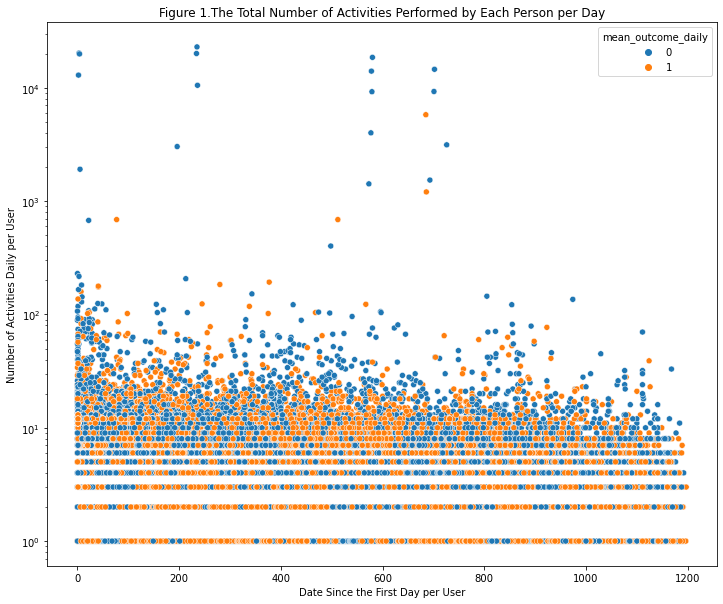

In [21]:
fig, axes = plt.subplots(figsize=(12, 10))

sns.scatterplot(data=freq, x='date_diff', y='act_cnt_daily',hue='mean_outcome_daily')

axes.set_yscale('log')
axes.set(xlabel='Date Since the First Day per User', ylabel='Number of Activities Daily per User')
axes.set_title('Figure 1.The Total Number of Activities Performed by Each Person per Day')

In [22]:
# based on the analysis above, I set more than 300 times of activities a day as a threshold
rob_id = freq[freq['act_cnt_daily']>300].index.get_level_values(0).unique()
rob_id = pd.Series(rob_id)

# create a new feature called 'rob'
train['bot'] = train['people_id'].isin(rob_id)
train[['people_id', 'bot']].head()

,people_id,bot
0,ppl_100,False
1,ppl_100,False
2,ppl_100,False
3,ppl_100,False
4,ppl_100,False


In [23]:
# there are 197536 activities are performed by 'bot'
train['bot'].value_counts()

False    1999755
True      197536
Name: bot, dtype: int64

In [24]:
# Among the activities that marked by 'bot', only 0.007% have business values
# Therfore, 'bot' is a good indicator to show if an activity has business value or not
train[train['bot']]['outcome'].value_counts()

0    189005
1      8531
Name: outcome, dtype: int64

There is a moderate correlation between outcome and bot.

In [25]:
# good correlation
train[['bot', 'outcome']].corr()

,bot,outcome
bot,1.000000,-0.253514
outcome,-0.253514,1.000000


### 2.1.2 Activity Date and Frequency

**Will active new users have more business value? --Seems no.**

A new hypothesis based on 'date_diff' is that people performed activities within the **first day, first week, or first month** since they first appeared on this platform, is a sign of more interests on the platform. Therefore, they may have more business values. 

The results show that people come back to perform activities within the first week and month do have more business values, but with a weak correlation.

In [26]:
# create three datasets that contains first day, week, and month user behavior, respectively
first_day_act = train[(train['date_diff'] == 0) & ~(train['bot'])]
first_week_act = train[(train['date_diff'] <= 7) & ~(train['bot'])]
first_month_act = train[(train['date_diff'] <= 30) & ~(train['bot'])]

In [27]:
# create three new columns to identify is this user performed activities within the first day, week, or month
# since this user first appeared
# first day
first_day_user_lst = first_day_act['people_id'].unique()
train['first_day_user'] = train['people_id'].isin(first_day_user_lst)

# first week
first_week_user_lst = first_week_act['people_id'].unique()
train['first_week_user'] = train['people_id'].isin(first_week_user_lst)

# first month
first_month_user_lst = first_month_act['people_id'].unique()
train['first_month_user'] = train['people_id'].isin(first_month_user_lst)

In [28]:
# calculate their correlation with outcome
time_lst = ['day', 'week', 'month']

for i in time_lst:
    time_range = 'first_' + i + '_user'
    print('Correlation of ', time_range, ' with Outcome: ', train[[time_range, 'outcome']].corr().iloc[1,0].round(4))

Correlation of  first_day_user  with Outcome:  -0.0313
Correlation of  first_week_user  with Outcome:  0.0211
Correlation of  first_month_user  with Outcome:  0.0368


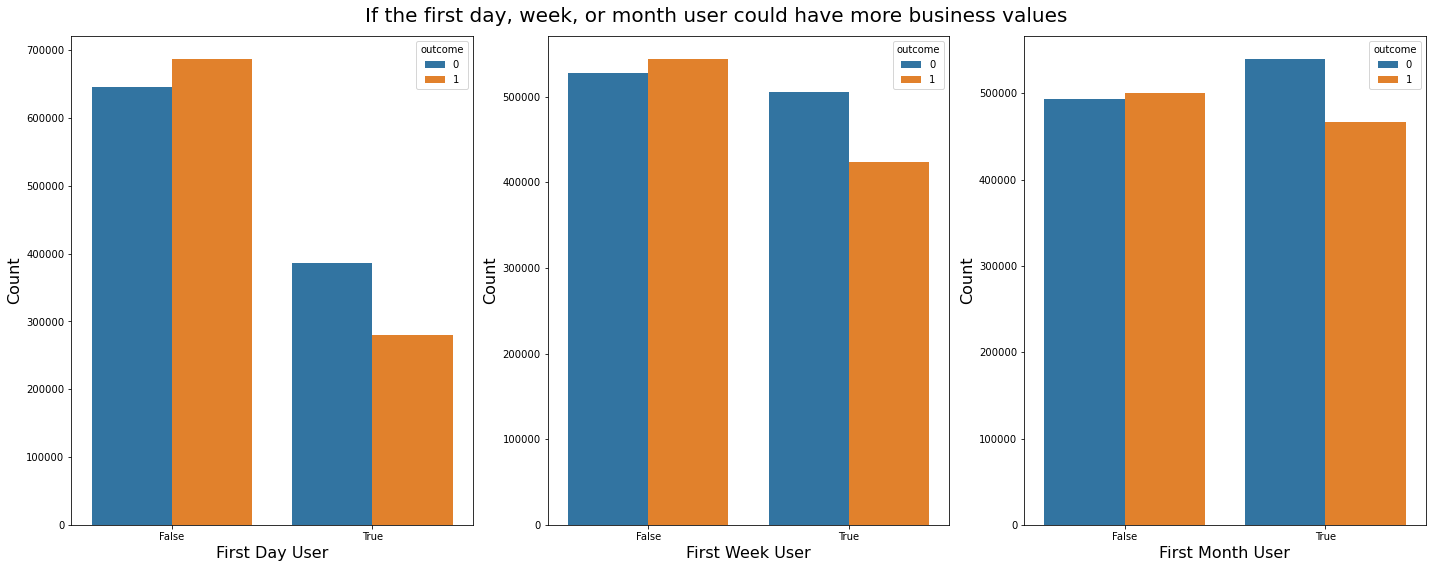

In [29]:
time_lst = ['Day', 'Week', 'Month']
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(data=train[~train['bot']], x='first_day_user', hue='outcome', ax=axes[0])
sns.countplot(data=train[~train['bot']], x='first_week_user', hue='outcome', ax=axes[1])
sns.countplot(data=train[~train['bot']], x='first_month_user', hue='outcome', ax=axes[2])

for i in range(3):
    axes[i].set_xlabel('First ' + time_lst[i] + ' User', fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    
plt.suptitle('If the first day, week, or month user could have more business values', fontsize=20)
plt.tight_layout()

**Will frequent people(user) have more business values? Emmm, still no.**

The correlation result showed that the total number of activities per person did have a positive effect, but there is only a weak correlation.

In [30]:
# create a new table to summarize the number of activities each people has performed in total, and their results
activity_stats = train[~train['bot']].groupby('people_id').agg({'activity_id':'count', 'outcome':'mean'})
activity_stats.columns = ['total_cnt_activity', 'mean_outcome']
activity_stats.head(10)

,total_cnt_activity,mean_outcome
people_id,,
ppl_100,6,0.0
ppl_100002,2,1.0
ppl_100003,34,1.0
ppl_100006,3,1.0
ppl_100013,5,1.0
ppl_100019,2,1.0
ppl_100025,46,0.0
ppl_100028,3,0.0
ppl_100029,1,0.0


In [31]:
activity_stats[['total_cnt_activity', 'mean_outcome']].corr().round(4)

,total_cnt_activity,mean_outcome
total_cnt_activity,1.0000,0.0452
mean_outcome,0.0452,1.0000


**Is there a time series pattern of activities that have business values?**

To answer this question, I calculated the their correlation with the outcome, but only found a weak correlation. 

The figures below showed that in certain months, i.e.April, May, Aug, Sep, Oct, the activities tend to have no business values. In the other months, there is no big differences. For days in a week, there is no obvious pattern. For days in a month, in certain days like 18th, 19th, 20th, 22nd, 23rd, the activities tend to have less business values.

I will still include them in the following Random Forest modeling to see if those parameters is important or not.

In [32]:
# transform date data into an appropriate data type
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.isocalendar().week
train['day_of_week'] = train['date'].dt.dayofweek
train['day'] = train['date'].dt.day

train[['date','month', 'week', 'day', 'day_of_week','outcome']].corr()['outcome']

month         -0.059040
week          -0.062925
day           -0.052264
day_of_week    0.006306
outcome        1.000000
Name: outcome, dtype: float64

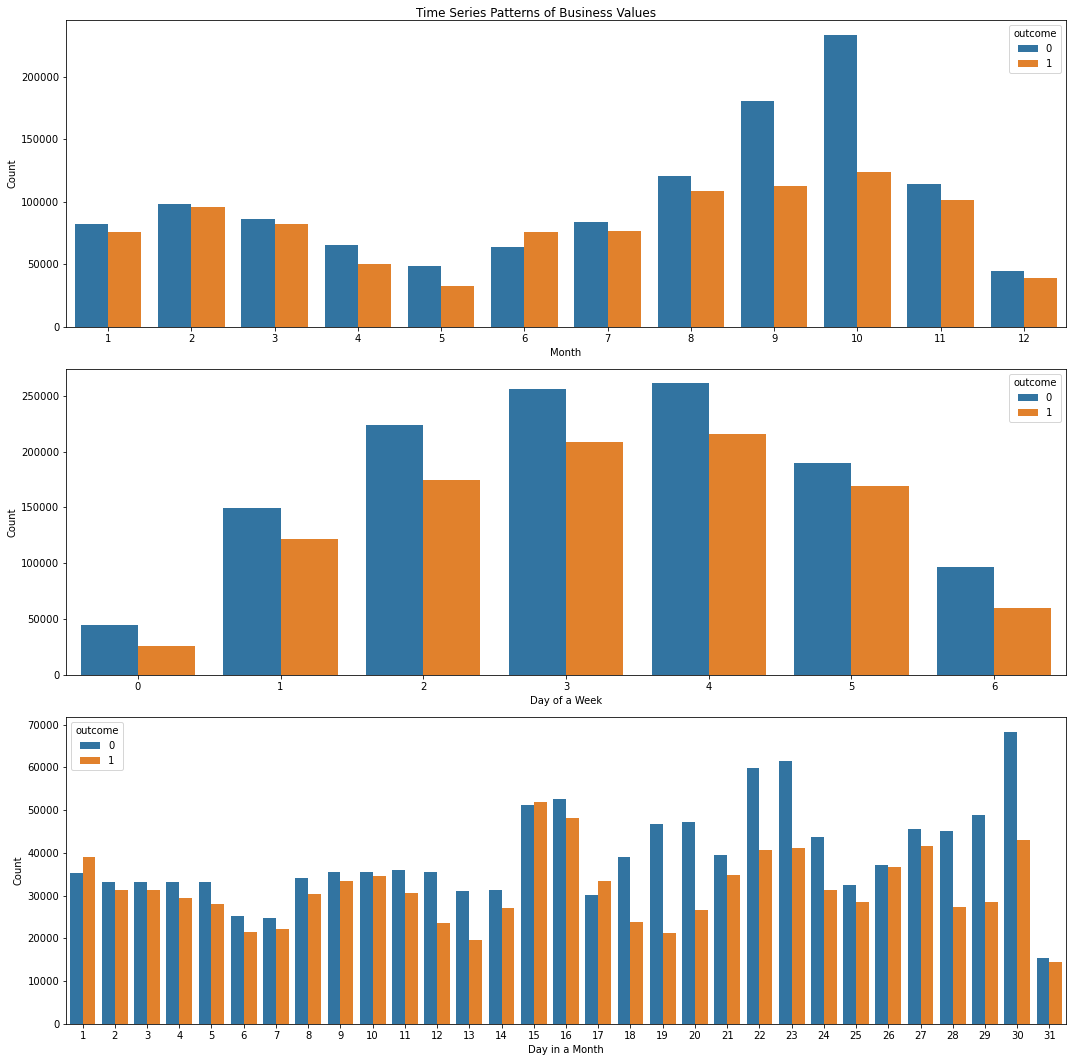

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

sns.countplot(data=train, x='month', hue='outcome', ax=axes[0])
axes[0].set(xlabel='Month', ylabel='Count')

sns.countplot(data=train, x='day_of_week', hue='outcome', ax=axes[1])
axes[1].set(xlabel='Day of a Week', ylabel='Count')

sns.countplot(data=train, x='day', hue='outcome', ax=axes[2])
axes[2].set(xlabel='Day in a Month', ylabel='Count')

plt.suptitle('Time Series Patterns of Business Values')
plt.tight_layout()

### 2.1.3 People Groups

All the 'people_id' in this dataset are grouped into 29,899 groups.I found that among certain groups, the total number of activities performed equals to the sum of outcomes, which means all the activity that performed by the people that belongs to this group have positive business values. On the other hand, for some groups, none of the activities in those groups have positive values. I conducted the analysis step by step in the following.

In [34]:
# create a summary table to summarize that, in each group, how many unique people, how many bot accounts
# how many activities and what are the outcomes
people_group = train.groupby('group_1_people').agg({'outcome':'sum', 'activity_id':'count',\
                                                    'people_id':'nunique', 'bot':'sum'})
people_group.columns = ['sum_outcome', 'cnt_activity', 'cnt_people', 'cnt_bot']
people_group.sort_values(by='sum_outcome', ascending=False)

,sum_outcome,cnt_activity,cnt_people,cnt_bot
group_1_people,,,,
group 667,15865,15865,1237,0
group 8386,7929,7929,819,0
group 20472,7052,7053,2,7052
group 9280,5492,5492,546,0
group 17899,4767,4767,339,0
...,...,...,...,...
group 29900,0,19,1,0
group 29911,0,3,1,0
group 29918,0,21,1,0


In [35]:
# for groups with sum_outcome = cnt_activity, it means all the results in this group is positive
#I mark those as positive groups
people_group[people_group['sum_outcome'] == people_group['cnt_activity']].describe(percentiles=[0.25, 0.5, 0.75, 0.9])
positive_groups = people_group[people_group['sum_outcome'] == people_group['cnt_activity']].index

train['positive_group'] = train['group_1_people'].isin(positive_groups)

In [36]:
# use the same method to mark negative groups 
negative_groups = people_group[people_group['sum_outcome'] == 0].index

train['negative_group'] = train['group_1_people'].isin(negative_groups)

In [37]:
# to test if the 'bot' column that created before is duplicate with groups
# the result shows that in nagative groups, only 0.0098 percent of people_id in the negative_group are identified as rob
# therefore, those two columns are not duplicated.
train[(train['bot']) & (train['negative_group'])]['people_id'].nunique()/train[train['negative_group']]['people_id'].nunique() *100

0.009886307464162135

### 2.1.4 People Characteristics

People characteristics are complicated. There are 38 different kinds of characters. Among them, 10 characters are object data, and 28 of them are boolean data.

I use Label Encoder to transform them into integers. I did not use One Hot Encoder because one hot encoder will created too many columns. 

The correlation results showed that most of the people char are correlated with the outcome. I will use them all in the random forest model to test if a feature is important.

In [38]:
cat_char_people = []

for i in range(1, 10):
    cat_char_people.append('char_' + str(i) + '_people')

cat_char_people.append('char_38_people')

boo_char_people = []

for i in range(10, 38):
    boo_char_people.append('char_' + str(i) + '_people')
    
print('car_char_people: ', cat_char_people,'\n','\n' ,'boo_char_people: ',boo_char_people)

car_char_people:  ['char_1_people', 'char_2_people', 'char_3_people', 'char_4_people', 'char_5_people', 'char_6_people', 'char_7_people', 'char_8_people', 'char_9_people', 'char_38_people'] 
 
 boo_char_people:  ['char_10_people', 'char_11_people', 'char_12_people', 'char_13_people', 'char_14_people', 'char_15_people', 'char_16_people', 'char_17_people', 'char_18_people', 'char_19_people', 'char_20_people', 'char_21_people', 'char_22_people', 'char_23_people', 'char_24_people', 'char_25_people', 'char_26_people', 'char_27_people', 'char_28_people', 'char_29_people', 'char_30_people', 'char_31_people', 'char_32_people', 'char_33_people', 'char_34_people', 'char_35_people', 'char_36_people', 'char_37_people']


In [39]:
le = LabelEncoder()
people_char = []

for i in range(1, 39):
    col = 'char_' + str(i) + '_people'
    people_char.append(col)
    train[col] = le.fit_transform(train[col])

In [40]:
train[people_char].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 38 columns):
 #   Column          Dtype
---  ------          -----
 0   char_1_people   int32
 1   char_2_people   int32
 2   char_3_people   int32
 3   char_4_people   int32
 4   char_5_people   int32
 5   char_6_people   int32
 6   char_7_people   int32
 7   char_8_people   int32
 8   char_9_people   int32
 9   char_10_people  int64
 10  char_11_people  int64
 11  char_12_people  int64
 12  char_13_people  int64
 13  char_14_people  int64
 14  char_15_people  int64
 15  char_16_people  int64
 16  char_17_people  int64
 17  char_18_people  int64
 18  char_19_people  int64
 19  char_20_people  int64
 20  char_21_people  int64
 21  char_22_people  int64
 22  char_23_people  int64
 23  char_24_people  int64
 24  char_25_people  int64
 25  char_26_people  int64
 26  char_27_people  int64
 27  char_28_people  int64
 28  char_29_people  int64
 29  char_30_people  int64
 30  char_31_people  in

In [41]:
print('The correlation between people characteristics and outcome:')
train[people_char + ['outcome']].corr()['outcome'].round(3)

The correlation between people characteristics and outcome:


char_1_people    -0.160
char_2_people     0.352
char_3_people     0.039
char_4_people     0.003
char_5_people    -0.081
char_6_people    -0.234
char_7_people    -0.047
char_8_people    -0.058
char_9_people     0.041
char_10_people    0.269
char_11_people    0.226
char_12_people    0.225
char_13_people    0.322
char_14_people    0.248
char_15_people    0.264
char_16_people    0.279
char_17_people    0.287
char_18_people    0.211
char_19_people    0.279
char_20_people    0.271
char_21_people    0.279
char_22_people    0.286
char_23_people    0.271
char_24_people    0.221
char_25_people    0.289
char_26_people    0.173
char_27_people    0.235
char_28_people    0.278
char_29_people    0.188
char_30_people    0.211
char_31_people    0.254
char_32_people    0.279
char_33_people    0.213
char_34_people    0.314
char_35_people    0.215
char_36_people    0.316
char_37_people    0.289
char_38_people    0.677
outcome           1.000
Name: outcome, dtype: float64

## 2.2 Activity Characters

### 2.2.1 Category

Overall, there are seven activity types. Activity type 6 and 7 have been less performed when compared with the others. After excluding the bot results, there is no evidents shows a specific type of activity can lead to a negative or positive outcome.

In [42]:
act_train['activity_category'].unique()

array(['type 4', 'type 2', 'type 3', 'type 5', 'type 1', 'type 7',
       'type 6'], dtype=object)

In [43]:
#plot a figure here
train['activity_category'].value_counts()

type 2    904683
type 5    490710
type 3    429408
type 4    207465
type 1    157615
type 6      4253
type 7      3157
Name: activity_category, dtype: int64

In [44]:
# most of the bots performed type 3 activity
train[train['bot']]['activity_category'].value_counts()

type 3    196759
type 4       466
type 2       280
type 5        21
type 1         9
type 7         1
Name: activity_category, dtype: int64

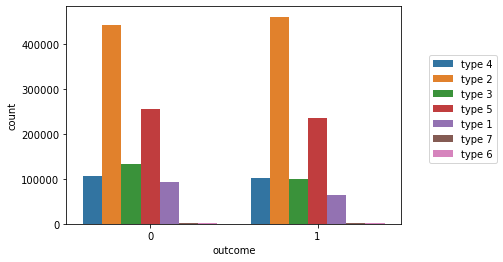

In [45]:
fig, axes = plt.subplots()
sns.countplot(data=train[~train['bot']], x='outcome', hue='activity_category')

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8))

### 2.2.2 Activity Characters

There are 6515 types of char_10_act. It can be inferred that char_10_act is an ensemble char, which contains information with multiple contexts.

It is found that 'type 1' activity does not have 'char_10_act'. For the other types of activities, they don't have chars 1-9. 

All features of activity characters are object data type so far.

In [46]:
# I did not see any clear association between a act_char and the outcome
# I will impute the data, label the missing values, 
# and calculate the correlations
for i in range(1, 11):
    char = 'char_' + str(i) + '_act'
    temp = train[train['activity_category'] == 'type 1'].groupby(char).\
    agg({'outcome':'sum', 'activity_id':'count'})
    temp.columns = ['sum_outcome', 'cnt_activity']
    print(temp)

            sum_outcome  cnt_activity
char_1_act                           
type 1             5297         14938
type 10            2849          7795
type 11             759          2333
type 12            6204         14917
type 13             554          1586
type 14             454           990
type 15             328          1284
type 16             429          1229
type 17             539          1778
type 18              14            57
type 19             221           491
type 2            17422         38030
type 20             174           434
type 21               0             5
type 22              29           211
type 23            1294          2420
type 24             186           641
type 25             256           694
type 26             825          2220
type 27             118           199
type 28             200           706
type 29             940          1233
type 3             5607         12372
type 30             232           653
type 31     

In [47]:
# impute the data from each char
char_act = []
char_act_new = []

for i in range(1, 11):
    char = har = 'char_' + str(i) + '_act'
    train[char + '_new'] = train[char].str.split().str[1]
    char_act.append(char)
    char_act_new.append(char + '_new')

In [48]:
# fill NA value with 0
train[char_act_new] = train[char_act_new].fillna(0, axis=1).astype('int64')

In [49]:
print('The correlation between activity characteristics and outcome:')
train[char_act_new + ['outcome']].corr()['outcome'].round(3)

The correlation between activity characteristics and outcome:


char_1_act_new    -0.015
char_2_act_new    -0.013
char_3_act_new    -0.013
char_4_act_new    -0.017
char_5_act_new    -0.011
char_6_act_new    -0.017
char_7_act_new    -0.016
char_8_act_new    -0.014
char_9_act_new    -0.012
char_10_act_new    0.028
outcome            1.000
Name: outcome, dtype: float64

# 3. Feature Engineering

Through the exploratory analysis. I have created new features,encode categorical features and filled missing values. In this section, I will deal with outliers, encode left categorical features,and use same methods to process the 'test' dataset.

In [50]:
train['activity_category_new'] = train['activity_category'].str.split().str[1]
train['group_1_people_new'] = train['group_1_people'].str.split().str[1]

In [51]:
drop_features = ['people_id', 'activity_id', 'date', 'date_people', 'activity_category', 'group_1_people'] + char_act 
final_train = train.drop(drop_features, axis=1)

## Preprocessing Test Data

In [52]:
# import dataset
act_test = pd.read_csv('https://media.githubusercontent.com/media/tkkkkkz/Data_Science_Projects/main/Predicting%20Red%20Hat%20Business%20Value/Data/act_test.csv')

In [53]:
act_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498687 entries, 0 to 498686
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   people_id          498687 non-null  object
 1   activity_id        498687 non-null  object
 2   date               498687 non-null  object
 3   activity_category  498687 non-null  object
 4   char_1             40092 non-null   object
 5   char_2             40092 non-null   object
 6   char_3             40092 non-null   object
 7   char_4             40092 non-null   object
 8   char_5             40092 non-null   object
 9   char_6             40092 non-null   object
 10  char_7             40092 non-null   object
 11  char_8             40092 non-null   object
 12  char_9             40092 non-null   object
 13  char_10            458595 non-null  object
dtypes: object(14)
memory usage: 53.3+ MB


In [54]:
# mark columns in the test dataset to avoid duplicate feature names after merging with people
test_new_columns = []

for column in act_test.columns:
    if 'char' in column:
        column += '_act'
    test_new_columns.append(column)

act_test.columns = test_new_columns

In [55]:
test = pd.merge(act_test, people, how='left',on='people_id')

# transform data types of 'date'
test['date'] = pd.to_datetime(test['date'])
test['date_people'] = pd.to_datetime(test['date_people'])

# create a new feature, date_diff
test['date_diff'] = test['date'] - test['date_people']
test['date_diff'] = test['date_diff']/np.timedelta64 (1, 'D')

# create new features that related with date
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day_of_week'] = test['date'].dt.dayofweek
test['day'] = test['date'].dt.day

In [57]:
# create a frequency table to identify bots in the test dataset
freq_test = test.groupby(['people_id', 'date_diff'])['activity_id'].agg(['count'])
bot_id_test = freq_test[freq_test['count']>200].index.get_level_values(0).unique()
bot_id_test = pd.Series(bot_id_test)

test['bot'] = test['people_id'].isin(bot_id_test)

In [58]:
# create three features to mark if the user has used the product within the first day, week, or month
first_day_act_test = test[(test['date_diff'] <= 1) & ~(test['bot'])]
first_day_user_lst_test = first_day_act_test['people_id'].unique()
test['first_day_user'] = test['people_id'].isin(first_day_user_lst_test)


first_week_act_test = test[(test['date_diff'] <= 7) & ~(test['bot'])]
first_week_user_lst_test = first_week_act_test['people_id'].unique()
test['first_week_user'] = test['people_id'].isin(first_week_user_lst_test)


first_month_act_test = test[(test['date_diff'] <= 30) & ~(test['bot'])]
first_month_user_lst_test = first_month_act_test['people_id'].unique()
test['first_month_user'] = test['people_id'].isin(first_month_user_lst_test)

In [59]:
char_act_test = []
char_act_new_test = []

for i in range(1, 11):
    char = 'char_' + str(i) + '_act'
    test[char + '_new'] = test[char].str.split().str[1]
    char_act_test.append(char)
    char_act_new_test.append(char + '_new')
    
test[char_act_new_test] = test[char_act_new_test].fillna(0, axis=1).astype('int64')

# create new features
test['positive_group'] = test['group_1_people'].isin(positive_groups)
test['negative_group'] = test['group_1_people'].isin(negative_groups)

In [60]:
le = LabelEncoder()
people_char_test = []

for i in range(1, 39):
    col = 'char_' + str(i) + '_people'
    people_char_test.append(col)
    test[col] = le.fit_transform(test[col])

In [61]:
test['activity_category_new'] = test['activity_category'].str.split().str[1]
test['group_1_people_new'] = test['group_1_people'].str.split().str[1]

# 4. Model Training

I will start with a simple random forest model. The model can help to determine: 

* if a random forest model can be useful in this model building
* which features are more important, which are less important that can be delete from the model

After a first model training, I will adjust the train dataset based on random forest results. Next, I will use a GridSearchCV to build a better and more robust model. 

### 4.1 Feature Importances

In [62]:
x = final_train.drop('outcome', axis=1)
y= final_train['outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [65]:
# build a model and fit the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print('The auc score is: ', roc_auc_score(y_test, y_pred).round(4))

The auc score is:  0.9967


In [66]:
# Less important features, they will be excluded from the further model building
features_importance = pd.concat([pd.Series(x_train.columns), pd.Series(rf.feature_importances_)], axis=1).sort_values(by=1, ascending=False)
features_importance.tail(25)

,0,1
41,first_week_user,0.001528
27,char_28_people,0.001502
40,first_day_user,0.001480
20,char_21_people,0.001344
11,char_12_people,0.001319
9,char_10_people,0.001230
28,char_29_people,0.001051
17,char_18_people,0.001049
15,char_16_people,0.000999
32,char_33_people,0.000984


### 4.2 Random Forest

After exclude 25 less important features, I will use remained features to build a second random forest model.

In [67]:
# based on the previous feature importances, I dropped the last 25 less importance features
drop_features_2 = np.array(features_importance.tail(25).iloc[:,0])
final_train_2 = final_train.drop(drop_features_2, axis=1)

In [68]:
x = final_train_2.drop('outcome', axis=1)
y = final_train_2['outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**Note: since there are more than 2 million entries in this dataset, to avoid taking too much computational costs, I only tune two hyperparameters and test only two options for each parameters.Furthermore, I only used a 3-fold cross validation. **

In [69]:
n_estimators = [20, 50]
min_samples_split = [2, 10]
param_grid = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split}

rf_2 = RandomForestClassifier()
grid_model = GridSearchCV(rf_2, param_grid, cv=3)

In [70]:
grid_model.fit(x_train, y_train)

y_pred_2 = grid_model.predict(x_test)
print('The auc score is: ', roc_auc_score(y_test, y_pred_2))

The auc score is:  0.9970538834333434


In [1]:
# feature importances
pd.concat([pd.Series(x_train.columns), pd.Series(grid_model.best_params_.feature_importances_)], axis=1).sort_values(by=1,ascending=False)

NameError: name 'pd' is not defined

# 5. Model Deployment

In [ ]:
drop_features_test = ['people_id', 'activity_id', 'date', 'date_people', 'activity_category', 'group_1_people']\
                + char_act_test + list(drop_features_2)
final_test = test.drop(drop_features_test, axis=1)

In [ ]:
final_test_predict = grid_model.predict(final_test)

In [ ]:
final_submission = pd.concat([test['activity_id'],pd.Series(final_test_predict)], axis=1)

In [ ]:
submission = final_submission.to_csv('submission.csv', header=['activity_id', 'outcome'], index=False)

### Conclusions
This project is to predict if a user has business value based on the user behaviors data that was collected previously. The dataset is balanced. 

During the exploratory analysis, I found that there are bot traffic among the user activities, which indicates highly frequent activities in a single day but present no business values at all. Based on the bots' behaviors, I added a new boolean feature 'bot'. Moreover, I also found the frequency and date of a activity has poor correlations with the outcome. 

In terms of modeling, I used a default Random Forest model to help to identify feature importances. After dropping less important features, I used a Random Forest combining with Grid Search and Cross Validation to achieve the best prediction.